# <center> Penguins Dataset </center>

Load related libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import impute
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

Load dataset using seaborn library

In [2]:
penguins = sns.load_dataset('penguins')

Check dataset

In [3]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Control NaN values

In [4]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

To see general information about dataset

In [5]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


We have 2 nan values @ bill_length, bill_depth, flipper_length and mody_mass
We will fill this values using imputer

In [6]:
columns_name = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
imputer = impute.KNNImputer(missing_values=np.NaN, n_neighbors=5)
imputer.fit(penguins[columns_name])
penguins[columns_name] = imputer.transform(penguins[columns_name])

Now we have NaN values only at sex column

In [7]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


We can drop rows with nan values in sex column

In [8]:
penguins.dropna(inplace = True)

In [9]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


To use ML algorithm we should convert categorical data to numeric data

In [10]:
# To convert island values
penguins.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

We will use OneHotEncoder to conver island data to numeric.

In [11]:
encoder_island = OneHotEncoder().fit_transform(penguins[['island']])
penguins[['B', 'D', 'T']] = encoder_island.toarray()

In [12]:
penguins.drop(columns='island', inplace=True)

Now as we have two unique values in sex column we can use map function 

In [13]:
# Convert sex values to numerical data
penguins.sex = penguins.sex.map({'Female':1, 'Male':0})

Then drop sex column

In [14]:
penguins.drop(columns='sex',inplace=True)

In [15]:
penguins.head(10)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,B,D,T
0,Adelie,39.1,18.7,181.0,3750.0,0.0,0.0,1.0
1,Adelie,39.5,17.4,186.0,3800.0,0.0,0.0,1.0
2,Adelie,40.3,18.0,195.0,3250.0,0.0,0.0,1.0
4,Adelie,36.7,19.3,193.0,3450.0,0.0,0.0,1.0
5,Adelie,39.3,20.6,190.0,3650.0,0.0,0.0,1.0
6,Adelie,38.9,17.8,181.0,3625.0,0.0,0.0,1.0
7,Adelie,39.2,19.6,195.0,4675.0,0.0,0.0,1.0
12,Adelie,41.1,17.6,182.0,3200.0,0.0,0.0,1.0
13,Adelie,38.6,21.2,191.0,3800.0,0.0,0.0,1.0
14,Adelie,34.6,21.1,198.0,4400.0,0.0,0.0,1.0


Now split data using train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(penguins.iloc[:,1:],penguins.iloc[:,0], random_state=42)

Initialize model

In [17]:
forest = RandomForestClassifier(n_estimators=100, random_state=42)

Train the model

In [18]:
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
forest.predict(X_test)

array(['Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Chinstrap', 'Chinstrap', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie'], dtype=object

Print accuracy of model

In [20]:
print(f'Accuracy score is {accuracy_score(forest.predict(X_test), y_test)*100:.2f}%')

Accuracy score is 98.81%


#### The result is 98.81%

Decision tree of model

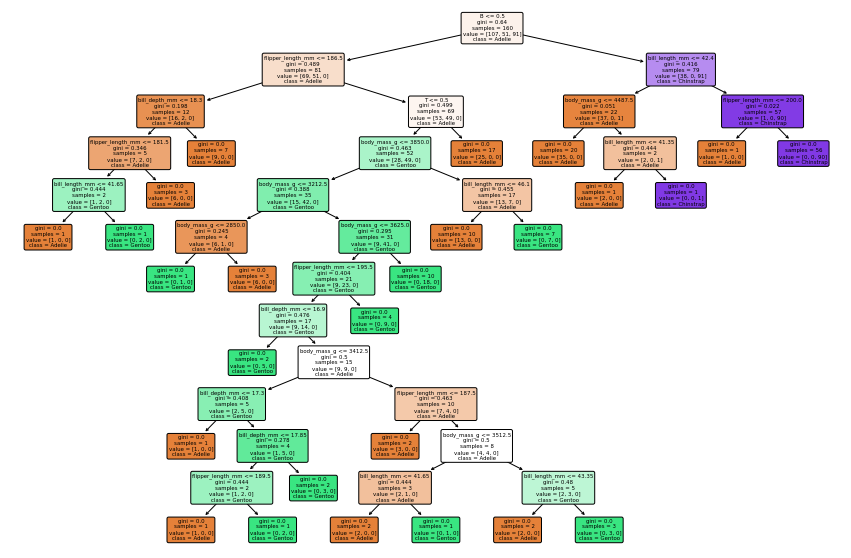

In [21]:

fig = plt.figure(figsize=(15, 10))
plot_tree(forest.estimators_[0], 
          feature_names = X_test.columns,
          class_names = y_test.unique(), 
          filled = True, rounded = True)

plt.show()